# Census Income Project

**Problem Statement:** To build a model that predict whether a person makes over $50K a year.

**Identifying type:** Target variable identified as binary classification, Hence i will try different classification models to find the best model.

### IMPORTING LIBRARIES

In [443]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

### IMPORTING THE DATA

In [444]:
#loading data saved in .csv format
df= pd.read_csv("census_data.csv")
df=pd.DataFrame(data=df)
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [445]:
# lets check the column names
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [446]:
# Lets know how big our data is.
df.shape

(32560, 15)

In [447]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Ours is a mixed data with Categorical and numeric columns.

In [448]:
# Lets check the statistical info for numerical data
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


1. Age is min 17 and max 48  
2. Min hours per week 1 and max can go upto 99 hours.

In [449]:
# lets check all columns 
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [450]:
# Lets find the most frequent value.
df['Workclass'].mode()

0     Private
dtype: object

There is ?(Character), which we should be dealing with.

In [451]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [452]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [453]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [454]:
df['Occupation'].mode()

0     Prof-specialty
dtype: object

There is ?(Character), which we should be dealing with.

In [455]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [456]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [457]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [458]:
df['Native_country'].mode()

0     United-States
dtype: object

In [459]:
# Target variable
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [460]:
# we have lots of ? in our dataset. lets replace all with most frequent values.
df["Workclass"]=df["Workclass"].replace("?", "Private")
df['Occupation']=df['Occupation'].replace("?", 'Prof-specialty')
df['Native_country']=df['Native_country'].replace("?", 'United-States')

In [461]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

### EXPLORATORY DATA ANALYSIS

In [462]:
# Checking for null values.
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

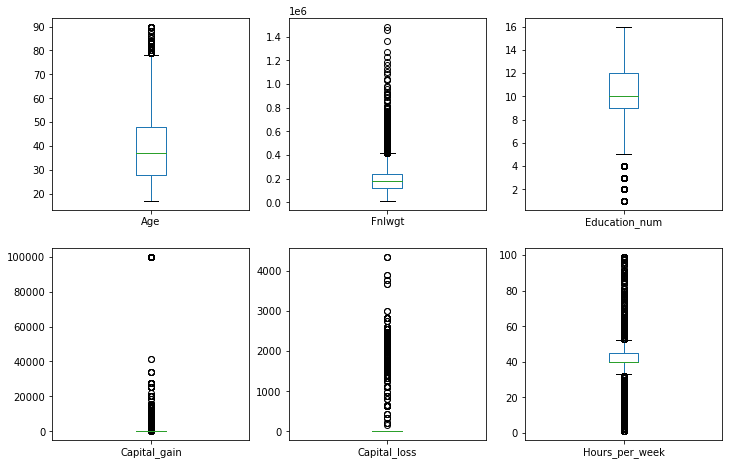

In [463]:
# outliers
df.plot(kind='box', figsize=(12,12), layout =(3,3), sharex=False, subplots=True)
plt.show()

**VISUALIZATION**

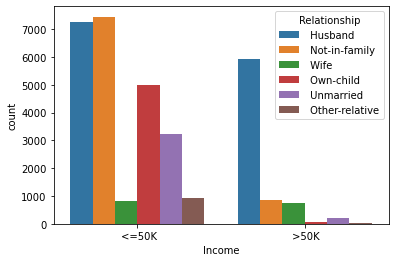

In [464]:
# lets analyse the relationship between target variable and attributes.
sns.countplot(x='Income',hue='Relationship',data=df)
plt.show()

Income is less for families who has own children and who are unmarried.  

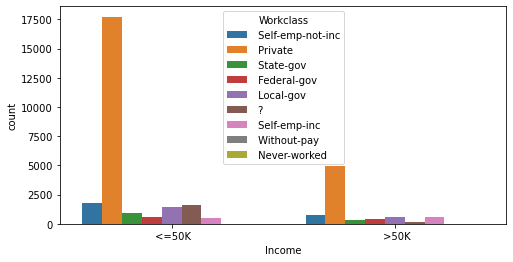

In [465]:
plt.figure(figsize=(8,4))
sns.countplot(x='Income',hue='Workclass',data=df)
plt.show()

In both the categories private sector employees are more.

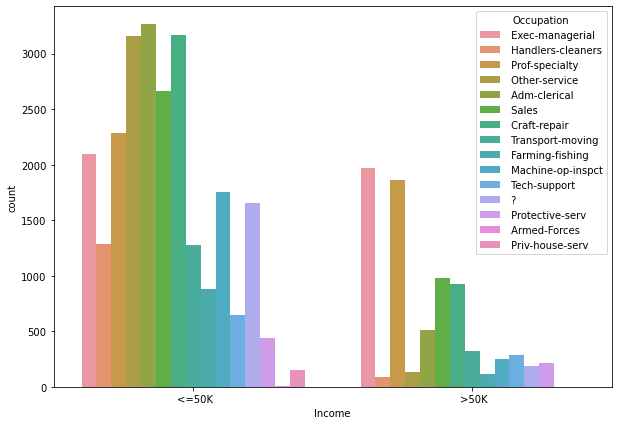

In [466]:
plt.figure(figsize=(10,7))
sns.countplot(x='Income',hue='Occupation',data=df)
plt.show()

In [467]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


We can see some positive correlation in Age column with capital_gain, capital_loss, hours_per week.  
also in Education_num, capital_gain, hours_per_week.

<AxesSubplot:>

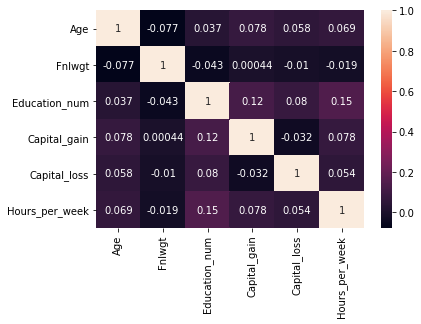

In [468]:
# Heat map
sns.heatmap(df.corr(), annot=True)

**HISTOGRAM**

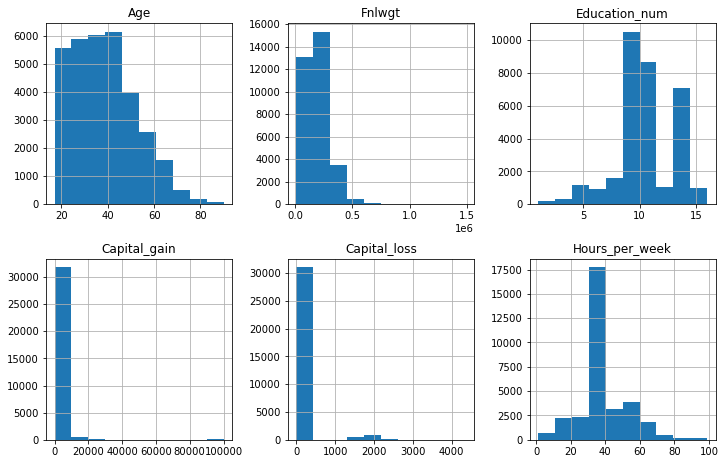

In [469]:
df.hist(figsize=(12,12), layout=(3,3), sharex=False)
plt.show()

age is spread from 17 to 90yrs and majority in the range 22-50.  
capital gain 0-15k.  
maximum people working in range 25-40 hours.    
majority has income above 35k

**FEATURE SCALING**

In [470]:
label_encoder = LabelEncoder()
df=df.apply(le.fit_transform)

In [471]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,6,2925,9,12,2,4,0,4,1,0,0,12,39,0
1,21,4,14085,11,8,0,6,1,4,1,0,0,39,39,0
2,36,4,15335,1,6,2,6,0,2,1,0,0,39,39,0
3,11,4,19354,9,12,2,10,5,2,0,0,0,39,5,0
4,20,4,17699,12,13,2,4,5,4,0,0,0,39,39,0


In [472]:
y = df['Income']
x= df.drop(['Income'], axis=1)

In [473]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

**LINEAR REGRESSION**

In [474]:
lr= LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train) #Accuracy score on train data
predlr= lr.predict(x_test)
# Confusion matrix and accuracy score on test data
print("Confusion Matrix:",confusion_matrix(y_test,predlr))
print("Classification Report:",classification_report(y_test,predlr))
print("Accuracy score:",accuracy_score(y_test, predlr))

Confusion Matrix: [[6918  494]
 [1390  966]]
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.93      0.88      7412
           1       0.66      0.41      0.51      2356

    accuracy                           0.81      9768
   macro avg       0.75      0.67      0.69      9768
weighted avg       0.79      0.81      0.79      9768

Accuracy score: 0.8071253071253072


In [476]:
# Cross Validated score for Logistic Regression
scr1= cross_val_score( lr,x,y, cv=10)
print("Cross Validated score for LR is:",scr1.mean())

Cross Validated score for LR is: 0.7934889434889435


**RANDOMFOREST CLASSIFIER**

In [477]:
rfc= RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100,max_depth=6,min_samples_leaf=8)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train) #Accuracy score on train data
predrfc= rfc.predict(x_test)
# Confusion matrix and accuracy score on test data
print("Confusion Matrix:",confusion_matrix(y_test,predrfc))
print("Classification Report:",classification_report(y_test,predrfc))
print("Accuracy score:",accuracy_score(y_test, predrfc))

Confusion Matrix: [[7138  274]
 [1117 1239]]
Classification Report:               precision    recall  f1-score   support

           0       0.86      0.96      0.91      7412
           1       0.82      0.53      0.64      2356

    accuracy                           0.86      9768
   macro avg       0.84      0.74      0.78      9768
weighted avg       0.85      0.86      0.85      9768

Accuracy score: 0.8575962325962326


In [478]:
# Cross Validated score for RFC.
scr2= cross_val_score( rfc,x,y, cv=10)
print("Cross Validated score for RFC is:",scr2.mean())

Cross Validated score for RFC is: 0.8527641277641278


**DECISIONTREE CLASSIFIER**

In [479]:
dtc= DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6,min_samples_leaf=8)
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Cofusion Matrix:",confusion_matrix(y_test,preddtc))
print("Classification Report:",classification_report(y_test,preddtc))
print("Accuracy Score:",accuracy_score(y_test,preddtc))

Cofusion Matrix: [[7105  307]
 [1153 1203]]
Classification Report:               precision    recall  f1-score   support

           0       0.86      0.96      0.91      7412
           1       0.80      0.51      0.62      2356

    accuracy                           0.85      9768
   macro avg       0.83      0.73      0.76      9768
weighted avg       0.85      0.85      0.84      9768

Accuracy Score: 0.8505323505323505


In [480]:
# Cross Validating DTC
scr3= cross_val_score( dtc,x,y, cv=10)
print("Cross Validated score for DTC is:",scr3.mean())

Cross Validated score for DTC is: 0.8532555282555283


**We get best result with Randomforest Classifier.**

**SAVING THE BEST MODEL**

In [481]:
import pickle
# save the model to disk
filename = 'finalmodelCENSUS.pkl'
pickle.dump(rfc,open(filename,'wb'))
#Load the model from disk
loaded_model= pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 1])